In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install stockstats
!pip install talib-binary
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from stockstats import StockDataFrame
import talib as ta
import mplfinance as mpf
import requests
import json
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots


In [ ]:
microsoft_df = yf.download('MSFT', 
                      start='2019-01-01', 
                      end='2022-05-29', 
                      progress=False,
)
microsoft_df.index.name = 'Date'
microsoft_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,99.550003,101.750000,98.940002,101.120003,97.353920,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,93.772453,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,98.133728,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,98.258911,35656100
2019-01-08,103.040001,103.970001,101.709999,102.800003,98.971336,31514400


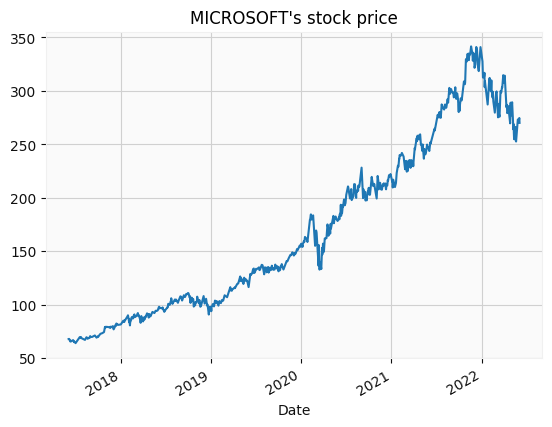

In [ ]:
ticker = yf.Ticker('MSFT')
microsoft_df = ticker.history(period="5y")
microsoft_df['Close'].plot(title="MICROSOFT's stock price")
microsoft_df.to_csv('mic.csv')

In [ ]:
df = pd.read_csv("mic.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-06-05,67.410987,68.272707,67.261119,67.701347,33316800,0.0,0
1,2017-06-06,67.720059,68.019788,67.691954,67.926117,31511100,0.0,0
2,2017-06-07,68.038538,68.160301,67.392245,67.804375,22301800,0.0,0
3,2017-06-08,67.916781,67.926143,66.970759,67.392250,24588300,0.0,0
4,2017-06-09,67.476539,67.514006,64.245080,65.865494,49187400,0.0,0


In [ ]:
microsoft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-06-05 to 2022-06-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Volume        1260 non-null   int64  
 5   Dividends     1260 non-null   float64
 6   Stock Splits  1260 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 78.8 KB


/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


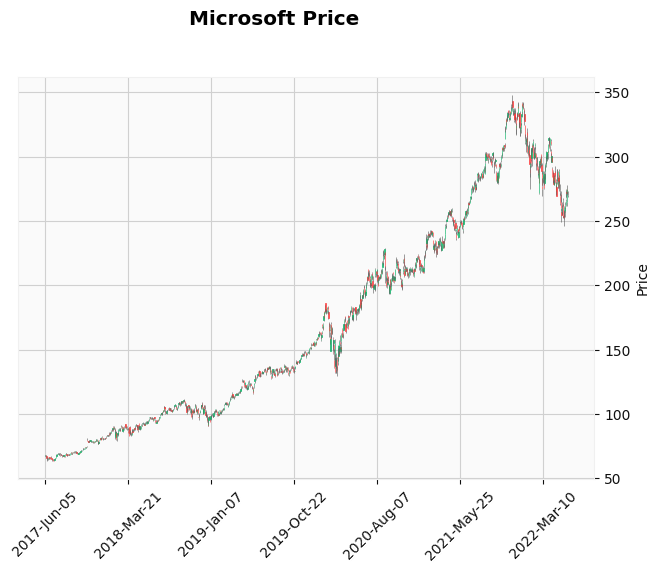

In [ ]:
mpf.plot(
    microsoft_df,
    type="candle", 
    title = "Microsoft Price",  
    style="yahoo"
    )

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


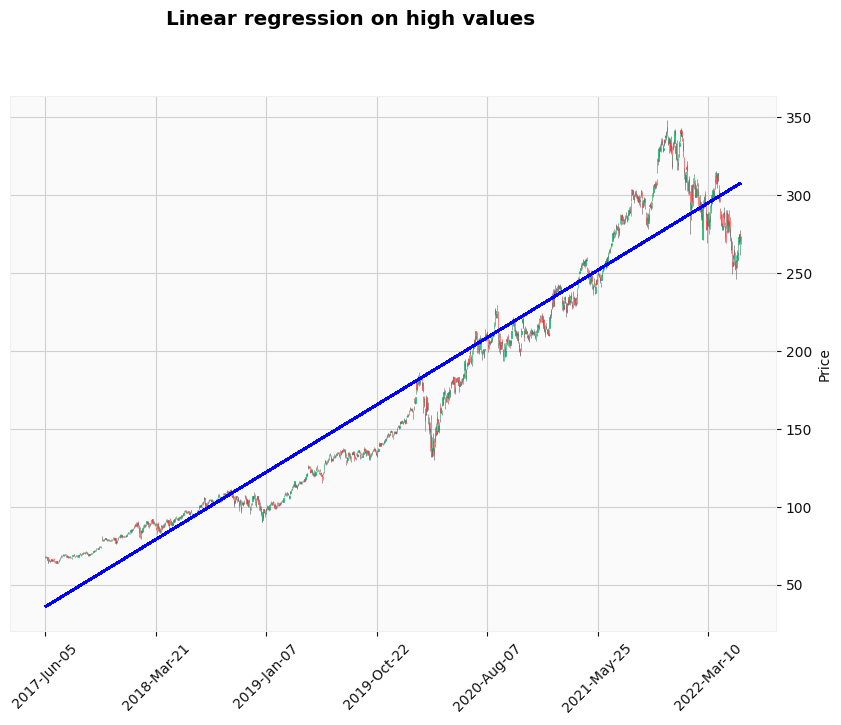

In [ ]:


d1 = microsoft_df.index[ 0]
d2 = microsoft_df.index[-1]
tdates = [(d1,d2)]
mpf.plot(microsoft_df,tlines=
         [
          dict(tlines=tdates,tline_use=['high'],tline_method='least-squares',colors='b'),
         ],
         figscale=1.33,
         type="candle",
         title="Linear regression on high values",
         style="yahoo"
         
        )



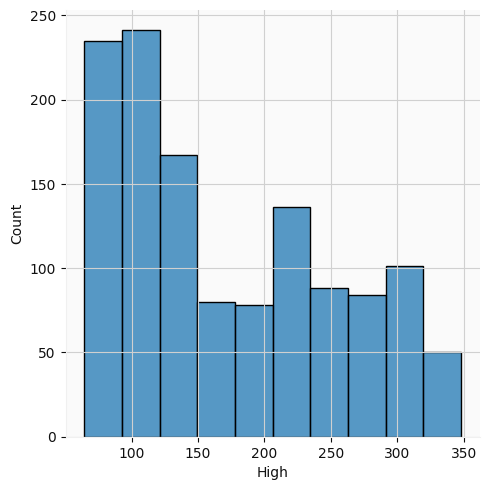

In [ ]:
sns.displot(microsoft_df, x="High", bins=10);

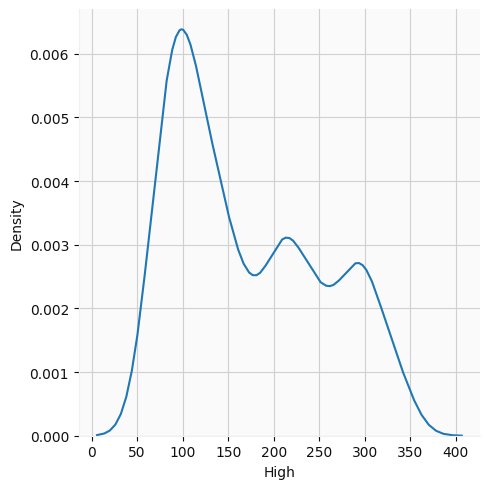

In [ ]:
sns.displot(microsoft_df, x="High", kind="kde");

In [ ]:
sm.tsa.acf(microsoft_df["High"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([1.        , 0.99821439, 0.99632685, 0.994472  , 0.99269795,
       0.99083426, 0.98898822, 0.98725717, 0.98561506, 0.98395161,
       0.98224189, 0.98054459, 0.97881334, 0.97703163, 0.9752927 ,
       0.97362139, 0.97197056, 0.97018636, 0.96838038, 0.96657941,
       0.96469548, 0.96272049, 0.96069442, 0.95873495, 0.95676569,
       0.95472196, 0.95270282, 0.95074389, 0.94897769, 0.94717521,
       0.94533274, 0.94332531, 0.94140016, 0.93954984, 0.93769888,
       0.93576038, 0.93386823, 0.93199021, 0.93009076, 0.92804208,
       0.92590037])

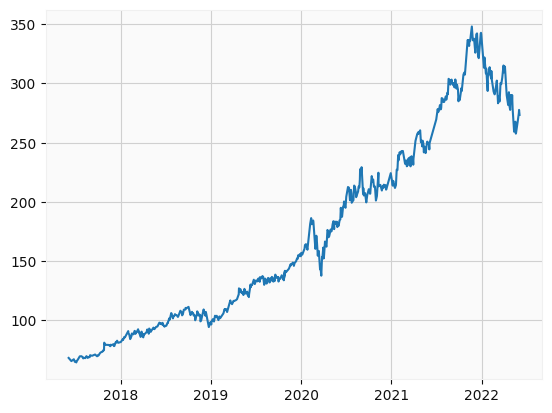

In [ ]:
plt.plot(microsoft_df["High"])

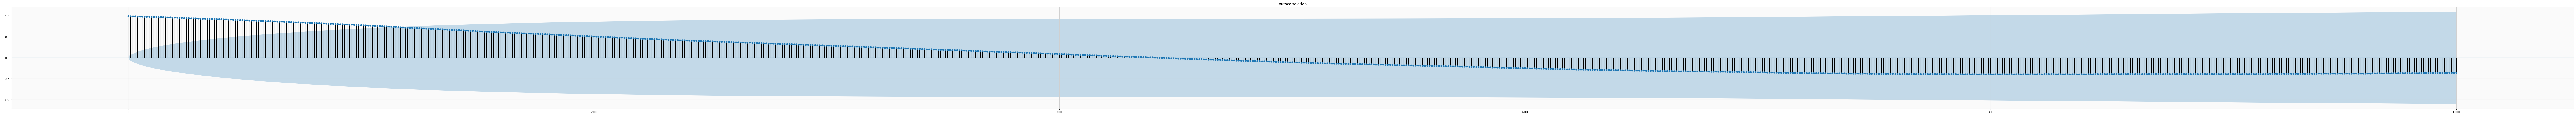

In [ ]:
fig, ax = plt.subplots(figsize=(150, 6))
tsaplots.plot_acf(microsoft_df["High"].values.squeeze(), lags=1000, ax=ax)
plt.show()

In [ ]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [ ]:
diff = difference(microsoft_df["High"].values)

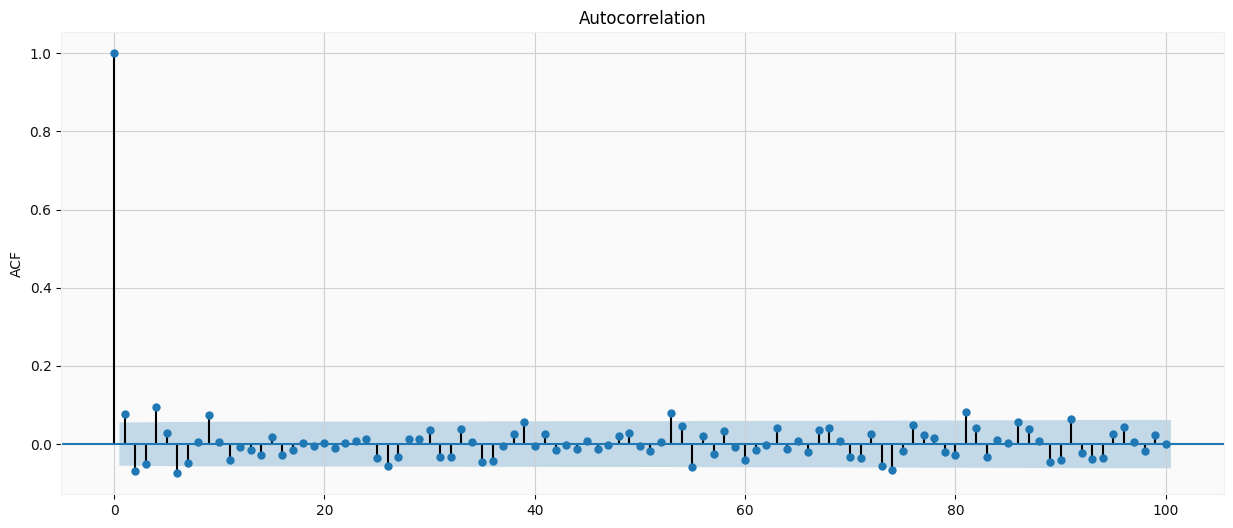

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
tsaplots.plot_acf(diff, lags=100, ax=ax)
plt.ylabel("ACF")
plt.show()

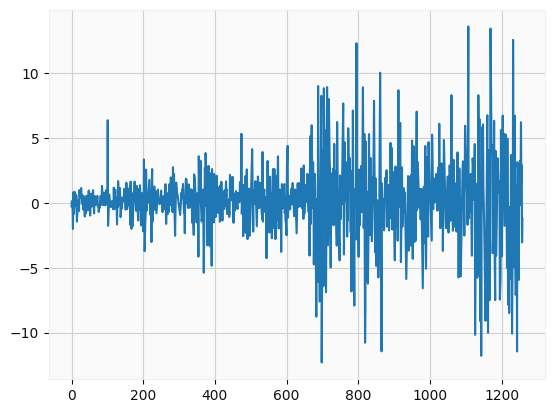

In [ ]:
plt.plot(diff)
plt.show()

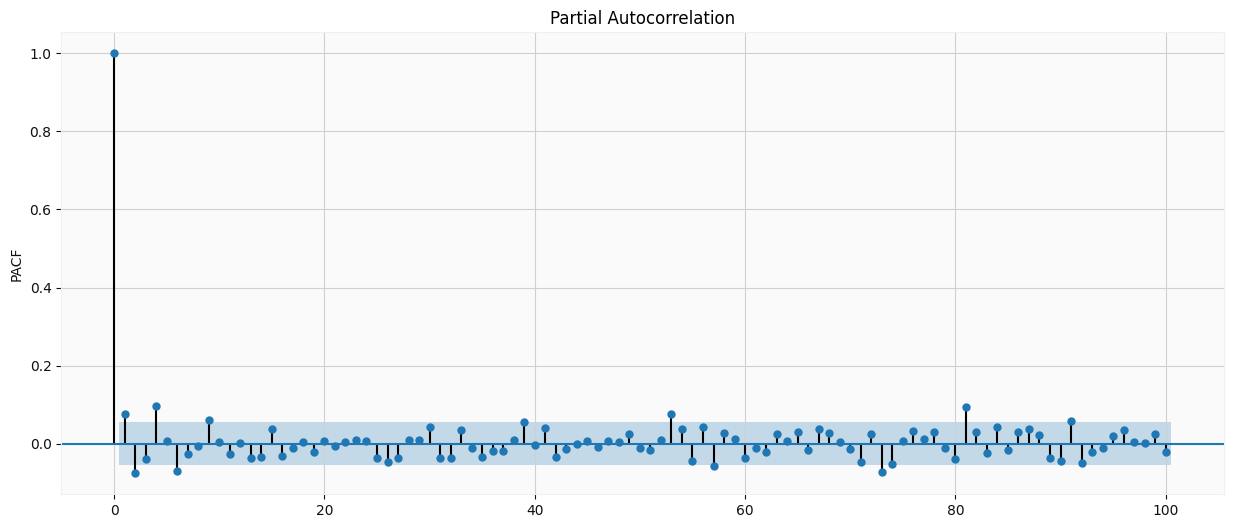

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
tsaplots.plot_pacf(diff, lags=100, ax=ax)
plt.ylabel("PACF")
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(microsoft_df["High"], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2999.478
Method:                       css-mle   S.D. of innovations              2.619
Date:                Mon, 06 Jun 2022   AIC                           6006.956
Time:                        07:20:28   BIC                           6027.508
Sample:                             1   HQIC                          6014.679
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1631      0.074      2.196      0.028       0.018       0.309
ar.L1.D.High    -0.9872      0.005   -199.837      0.000      -0.997      -0.977
ma.L1.D.High     1.0000      0.005    204.70

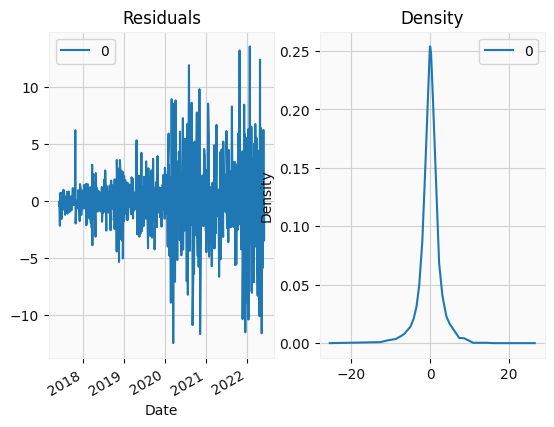

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

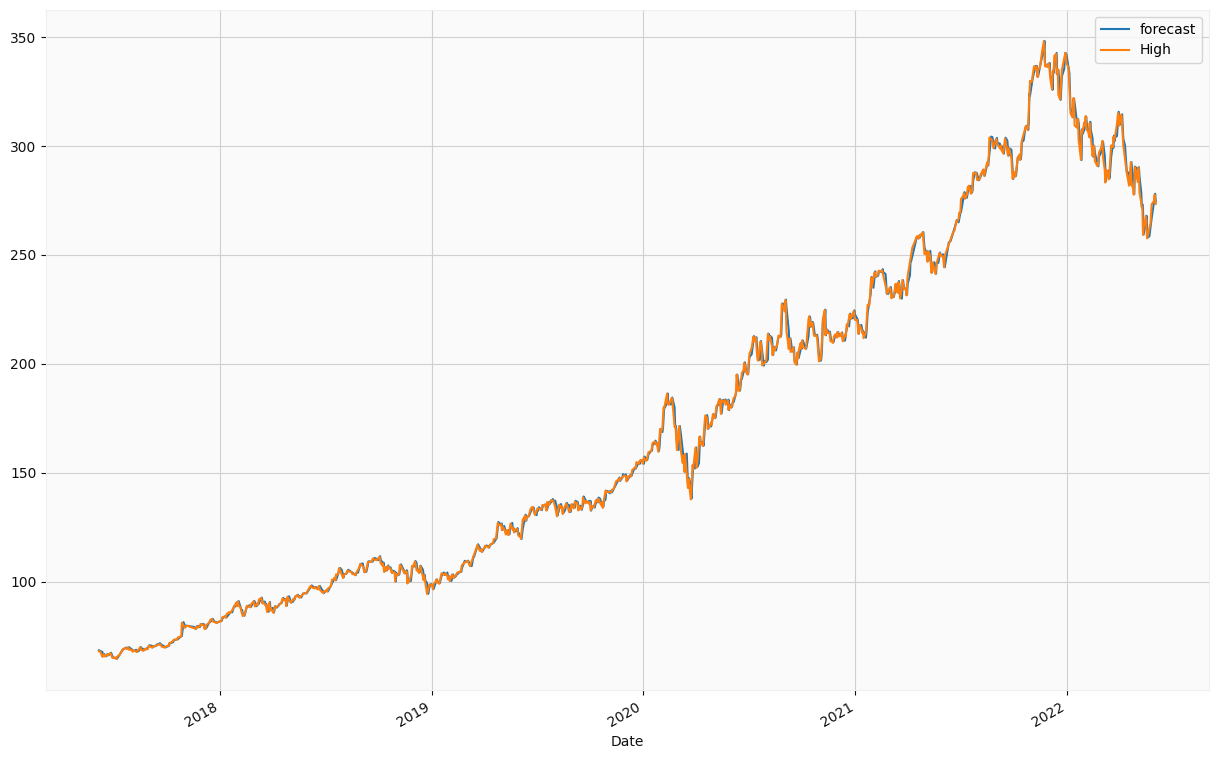

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
model_fit.plot_predict(dynamic=False, ax=ax)
plt.show()

In [ ]:
X = microsoft_df["High"]
size = int(len(X) * 0.7)
train = X[:size]
test = X[size:]
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                  881
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1917.097
Method:                       css-mle   S.D. of innovations              2.132
Date:                Mon, 06 Jun 2022   AIC                           3842.194
Time:                        07:58:51   BIC                           3861.319
Sample:                             1   HQIC                          3849.507
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1639      0.073      2.250      0.025       0.021       0.307
ar.L1.D.High    -0.9340      0.038    -24.409      0.000      -1.009      -0.859
ma.L1.D.High     0.9618      0.029     33.31

In [ ]:
fc, se, conf = model_fit.forecast(378, alpha=0.05)

In [ ]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


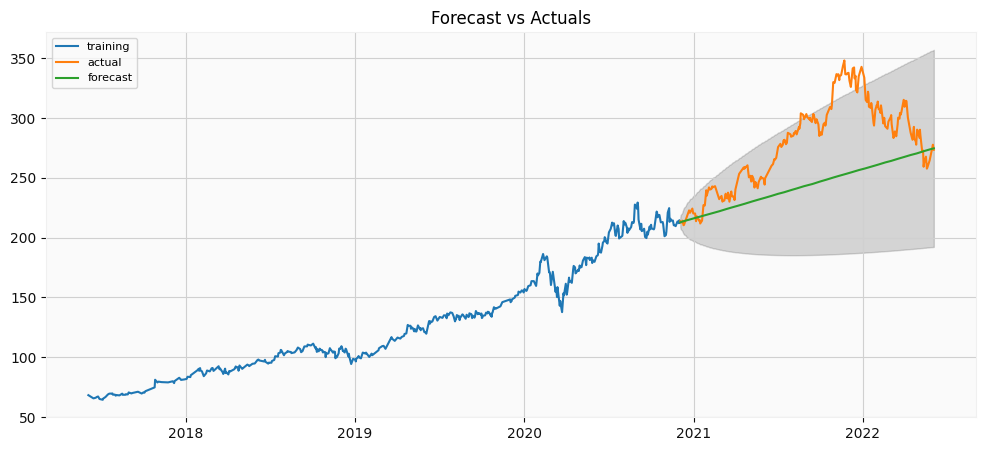

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()